In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from vega_datasets import data

import warnings
warnings.filterwarnings('ignore')

# plotting defaults
plt.rc('figure', figsize=(11, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [10]:
sf_temps = data.sf_temps()

In [11]:
sf_temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [12]:
# Reassign the sale_date column to be a datetime type
sf_temps['date'] = pd.to_datetime(sf_temps['date'])

# Sort rows by the date and then set the index as that date
sf_temps = sf_temps.set_index("date").sort_index()

In [13]:
sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [14]:
sf_temps.resample('D').mean().head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


**#1. Resample by the day and take the average temperature. Visualize the average temperature over time.**

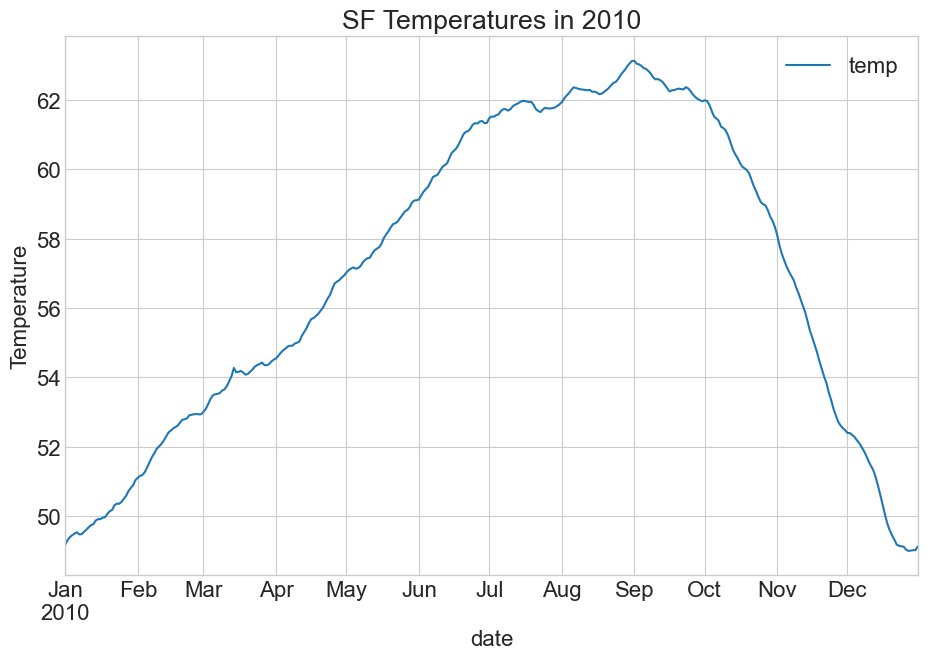

In [15]:
sf_temps.resample('D').mean().plot()
plt.title('SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

**#2. Write the code necessary to visualize the minimum temperature over time.**

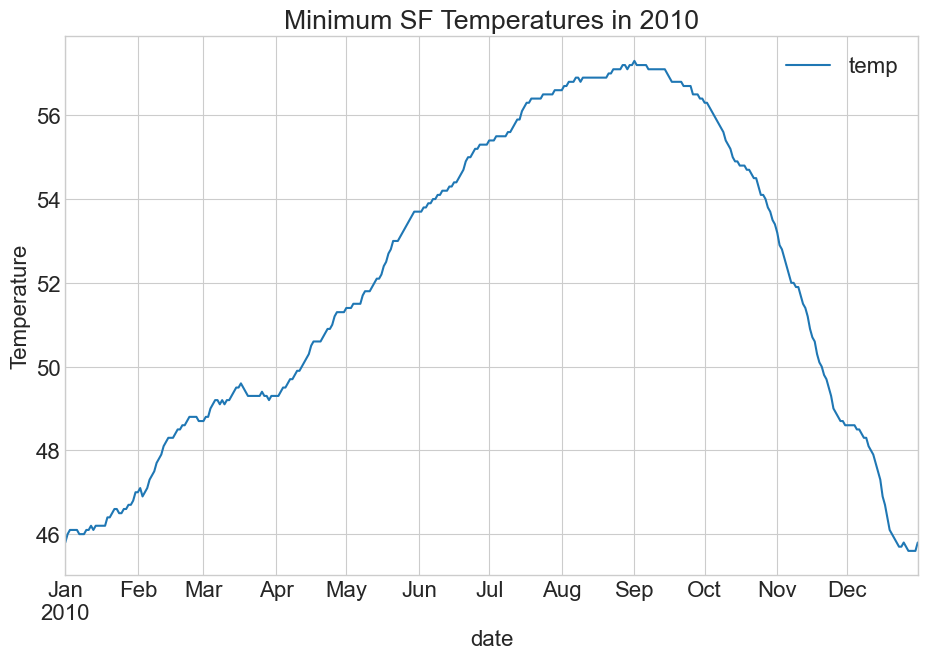

In [16]:
sf_temps.resample('D').min().plot()
plt.title('Minimum SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

**#3. Write the code necessary to visualize the maximum temperature over time.**

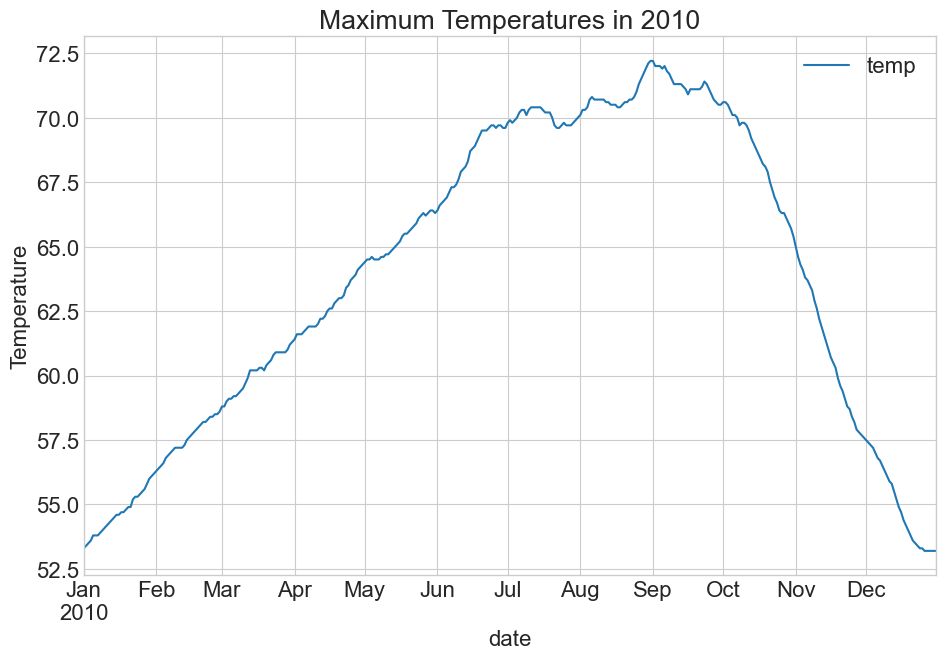

In [17]:
sf_temps.resample('D').max().plot()
plt.title('Maximum Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

**#4. Which month is the coldest, on average?**

In [18]:
sf_temps.temp.resample('M').mean().sort_values().head(1)

date
2010-01-31    49.98414
Name: temp, dtype: float64

**#5. Which month has the highest average temperature?**

In [21]:
sf_temps.temp.resample('M').mean().sort_values().tail(1)

date
2010-09-30    62.487083
Name: temp, dtype: float64

**#6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

In [22]:
daily_temps = sf_temps.temp.resample('D').agg(['min', 'max'])

In [23]:
daily_temps['temp_diff'] = daily_temps['max'] - daily_temps['min']

In [24]:
daily_temps.temp_diff.resample('M').max().sort_values(ascending=False)

date
2010-08-31    15.0
2010-09-30    14.9
2010-06-30    14.8
2010-07-31    14.8
2010-10-31    14.4
2010-05-31    13.1
2010-04-30    13.0
2010-03-31    12.0
2010-11-30    11.8
2010-02-28     9.9
2010-01-31     9.3
2010-12-31     8.9
Name: temp_diff, dtype: float64

**#7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.**

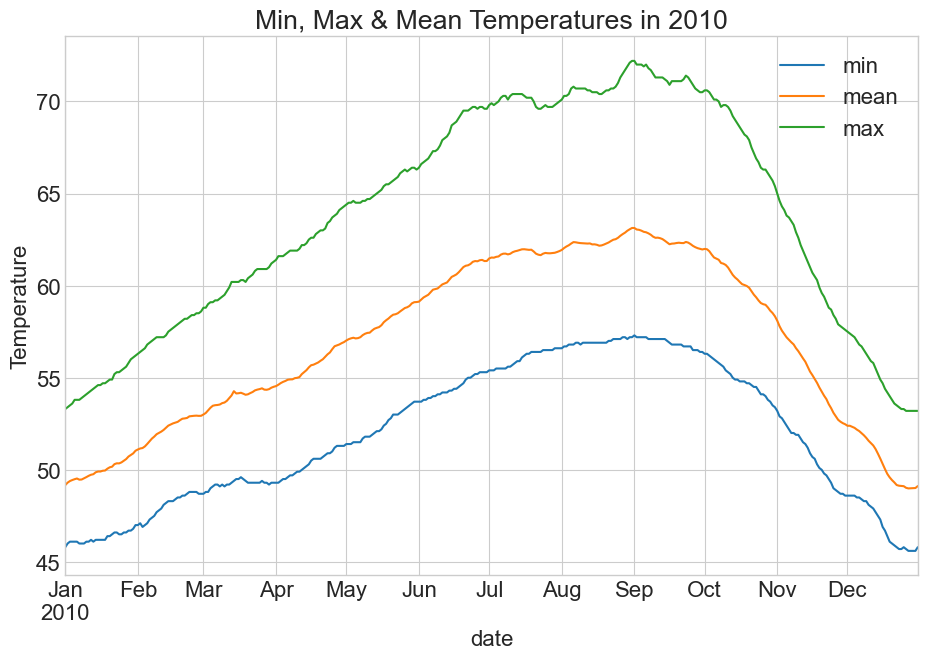

In [25]:
sf_temps.temp.resample('D').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Max & Mean Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

## Part 2:

In [26]:
seattle = data.seattle_weather()
seattle.sample(5)

,date,precipitation,temp_max,temp_min,wind,weather
434,2013-03-10,0.8,7.8,3.9,1.6,rain
326,2012-11-22,0.0,8.9,2.8,1.5,rain
315,2012-11-11,15.2,8.9,1.1,3.0,rain
641,2013-10-03,0.8,14.4,8.9,0.9,fog
18,2012-01-19,15.2,-1.1,-2.8,1.6,snow


**1. Which year and month combination has the highest amount of precipitation?**

In [27]:
seattle = seattle.set_index('date').sort_index()

In [28]:
seattle.precipitation.resample('M').mean().sort_values(ascending=False)

date
2015-12-31    9.177419
2014-03-31    7.741935
2015-11-30    7.086667
2012-11-30    7.016667
2012-03-31    5.903226
2012-12-31    5.612903
2012-01-31    5.590323
2014-02-28    5.542857
2014-10-31    5.532258
2012-10-31    5.493548
2013-09-30    5.226667
2013-04-30    4.986667
2015-02-28    4.792857
2014-11-30    4.103333
2015-10-31    3.948387
2014-12-31    3.929032
2015-03-31    3.661290
2014-04-30    3.536667
2013-01-31    3.409677
2013-11-30    3.210000
2012-02-29    3.182759
2014-01-31    3.032258
2015-01-31    3.000000
2015-08-31    2.687097
2014-05-31    2.580645
2012-06-30    2.503333
2012-04-30    2.270000
2013-03-31    2.248387
2013-05-31    1.951613
2014-09-30    1.890000
2015-04-30    1.720000
2012-05-31    1.683871
2014-08-31    1.483871
2013-02-28    1.439286
2013-12-31    1.367742
2013-10-31    1.264516
2013-08-31    1.109677
2013-06-30    1.103333
2012-07-31    0.848387
2015-09-30    0.703333
2014-07-31    0.632258
2014-06-30    0.626667
2015-05-31    0.477419
2015-0

In [29]:
seattle.precipitation.max()

55.9

In [30]:
seattle.precipitation.sort_values(ascending=False).head(1)

date
2015-03-15    55.9
Name: precipitation, dtype: float64

**2. Visualize the amount of monthly precipitation over time.**

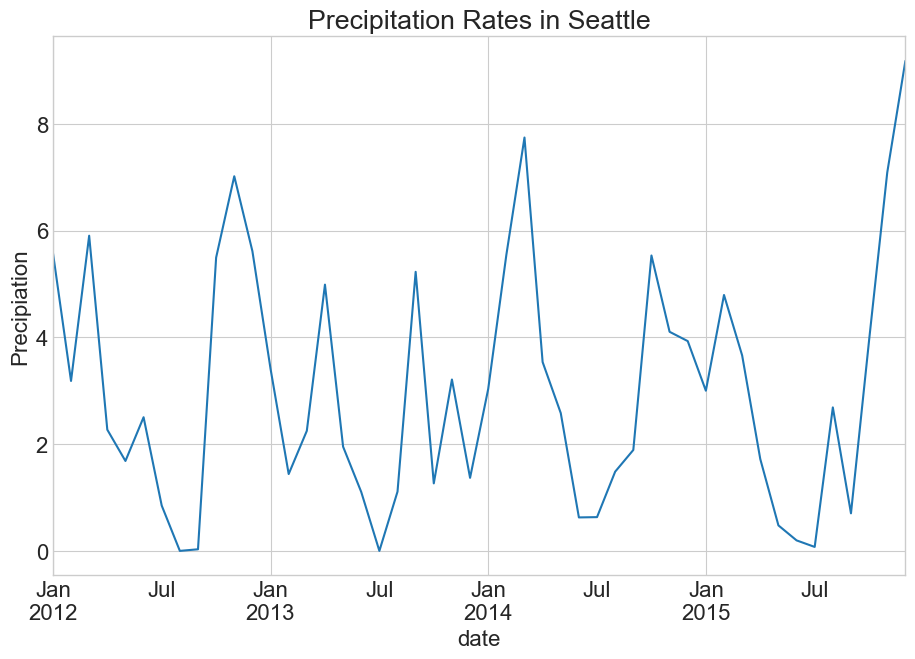

In [31]:
seattle.precipitation.resample('M').mean().plot()
plt.title('Precipitation Rates in Seattle')
plt.ylabel('Precipiation')
plt.show()

**3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

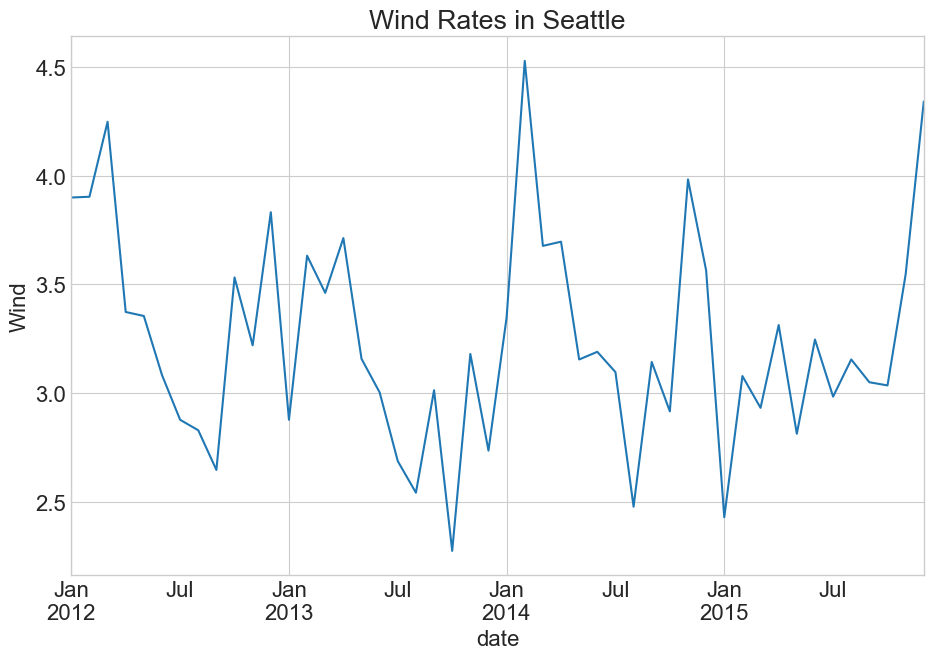

In [32]:
seattle.wind.resample('M').mean().plot()
plt.title('Wind Rates in Seattle')
plt.ylabel('Wind')
plt.show()

**4. Which year-month combination is the windiest?**

In [33]:
seattle.wind.sort_values(ascending=False).head(1)

date
2012-12-17    9.5
Name: wind, dtype: float64

**5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)**

In [34]:
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [35]:
seattle['sunny_day'] = seattle.weather == 'sun'

In [36]:
seattle.sunny_day.resample('Y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_day, dtype: int64

In [37]:
seattle.sunny_day.resample('Y').mean().sort_values(ascending=False)

date
2014-12-31    0.578082
2013-12-31    0.561644
2015-12-31    0.493151
2012-12-31    0.322404
Name: sunny_day, dtype: float64

**6. In which month does it rain the most?**

In [38]:
seattle['rainy_day'] = seattle.weather == 'rain'

In [39]:
seattle['month'] = seattle.index.month_name()

In [40]:
seattle.rainy_day.resample('M').sum().sort_values(ascending=False)

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
2012-06-30    19
2013-03-31    18
2012-01-31    18
2012-10-31    17
2012-02-29    17
2013-01-31    16
2012-05-31    16
2012-07-31    12
2012-09-30     4
2012-08-31     2
2015-08-31     2
2013-10-31     1
2014-08-31     1
2014-07-31     1
2015-01-31     1
2015-04-30     1
2014-10-31     1
2013-08-31     1
2013-07-31     1
2015-10-31     1
2015-07-31     0
2015-06-30     0
2015-05-31     0
2015-03-31     0
2015-02-28     0
2014-11-30     0
2015-11-30     0
2014-12-31     0
2015-09-30     0
2014-01-31     0
2014-09-30     0
2014-06-30     0
2014-05-31     0
2014-04-30     0
2014-03-31     0
2014-02-28     0
2013-12-31     0
2013-11-30     0
2013-09-30     0
2013-06-30     0
2013-05-31     0
2013-04-30     0
2015-12-31     0
Name: rainy_day, dtype: int64

In [41]:
seattle.groupby('month').precipitation.sum().sort_values(ascending=False)

month
November     642.5
December     622.7
March        606.2
October      503.4
January      466.0
February     422.0
April        375.4
September    235.5
May          207.5
August       163.7
June         132.9
July          48.2
Name: precipitation, dtype: float64

In [42]:
seattle.groupby('month').rainy_day.sum().sort_values(ascending=False)

month
February     40
March        37
January      35
November     25
December     23
April        20
October      20
June         19
May          16
July         14
August        6
September     4
Name: rainy_day, dtype: int64

In [43]:
seattle.groupby('month').precipitation.mean().sort_values(ascending=False)

month
November     5.354167
December     5.021774
March        4.888710
October      4.059677
January      3.758065
February     3.734513
April        3.128333
September    1.962500
May          1.673387
August       1.320161
June         1.107500
July         0.388710
Name: precipitation, dtype: float64

**7. Which month has the most number of days with a non-zero amount of precipitation?**

In [44]:
seattle.groupby('month').rainy_day.mean().sort_values(ascending=False)

month
February     0.353982
March        0.298387
January      0.282258
November     0.208333
December     0.185484
April        0.166667
October      0.161290
June         0.158333
May          0.129032
July         0.112903
August       0.048387
September    0.033333
Name: rainy_day, dtype: float64

In [45]:
seattle['precip_amnt'] = seattle.precipitation > 0

In [46]:
seattle.groupby('month').precip_amnt.mean().sort_values(ascending=False)

month
December     0.653226
February     0.646018
November     0.591667
March        0.588710
January      0.532258
October      0.491935
April        0.491667
June         0.308333
September    0.291667
May          0.274194
August       0.177419
July         0.088710
Name: precip_amnt, dtype: float64

## Part 3:

In [47]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [48]:
flights = flights.set_index('date').sort_index()

In [49]:
flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])

In [50]:
flights['hour'] = flights.index.strftime('%H')

In [51]:
flights.groupby('hour').delay.mean().sort_values(ascending=False).head(1)

hour
03    302.5
Name: delay, dtype: float64

In [52]:
flights.groupby('hour').delay.mean().idxmax()

'03'

**3. Does the day of the week make a difference in the delay amount?**

In [53]:
flights.resample('D').delay.mean()

date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [54]:
flights['day'] = flights.index.day_name()

In [55]:
weekday_delay = flights.groupby('day').delay.mean().sort_values(ascending=False)
weekday_delay

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

In [56]:
flights.day.value_counts()

Wednesday    3079
Friday       3028
Thursday     3011
Monday       2980
Tuesday      2945
Sunday       2614
Saturday     2343
Name: day, dtype: int64

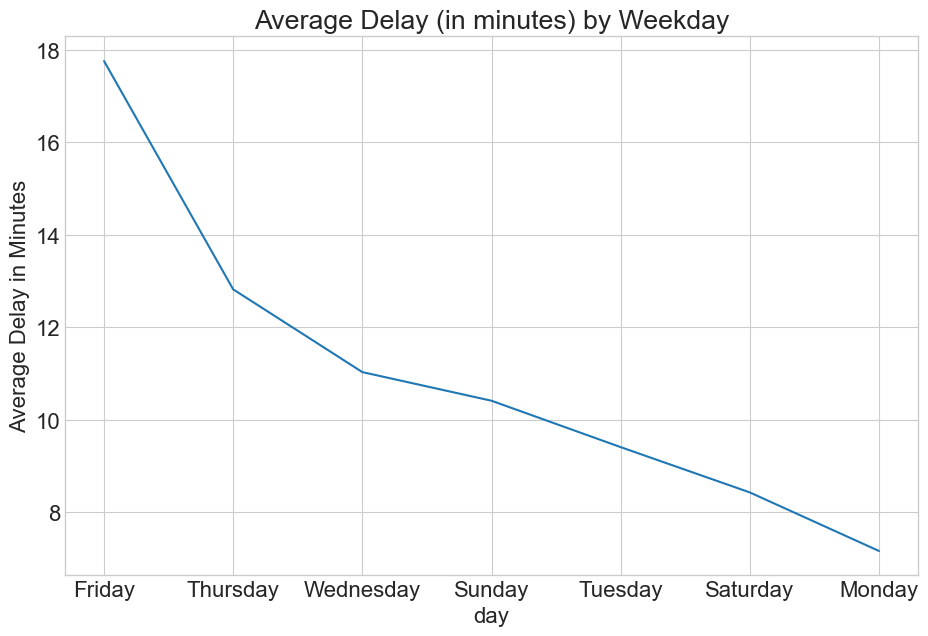

In [57]:
weekday_delay.plot()
plt.title('Average Delay (in minutes) by Weekday')
plt.ylabel('Average Delay in Minutes')
plt.show()

In [58]:
flights['month'] = flights.index.month_name()

In [59]:
monthly_delay = flights.groupby('month').delay.mean()
monthly_delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

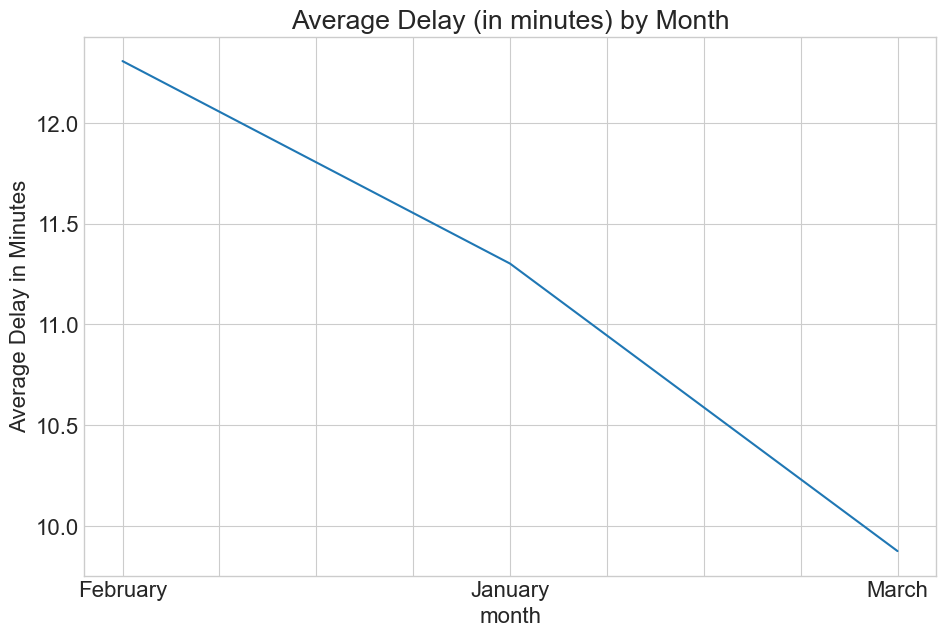

In [60]:
monthly_delay.plot()
plt.title('Average Delay (in minutes) by Month')
plt.ylabel('Average Delay in Minutes')
plt.show()